## Select MOFs and create dataset

In [2]:
import xlrd
from random import randint

In [3]:
xl_data = xlrd.open_workbook('mofs-loading.xlsx')

In [4]:
mof_names = xl_data.sheets()[0].col_values(0)[1:]
pza = xl_data.sheets()[0].col_values(1)[1:]
pza_err = xl_data.sheets()[0].col_values(2)[1:]
metal = xl_data.sheets()[0].col_values(7)[1:]
vp = xl_data.sheets()[0].col_values(8)[1:]
vf = xl_data.sheets()[0].col_values(9)[1:]
density = xl_data.sheets()[0].col_values(10)[1:]
gsa = xl_data.sheets()[0].col_values(11)[1:]
lcd = xl_data.sheets()[0].col_values(13)[1:]

In [5]:
n_mofs = 50

In [6]:
len(mof_names)

500

In [18]:
selected_mofs = []
dataset = []
while len(selected_mofs) < n_mofs:
    idx = randint(0, 500)
    mof = mof_names[idx]
    if mof not in selected_mofs:
        selected_mofs.append(mof)
        dataset.append([mof, metal[idx], pza[idx], pza_err[idx], vp[idx], vf[idx], density[idx], gsa[idx], lcd[idx]])

(array([ 10.,  15.,   9.,   4.,   2.,   1.,   4.,   3.,   1.,   1.]),
 array([ 0.26437959,  0.32553885,  0.3866981 ,  0.44785735,  0.50901661,
         0.57017586,  0.63133511,  0.69249437,  0.75365362,  0.81481287,
         0.87597213]),
 <a list of 10 Patch objects>)

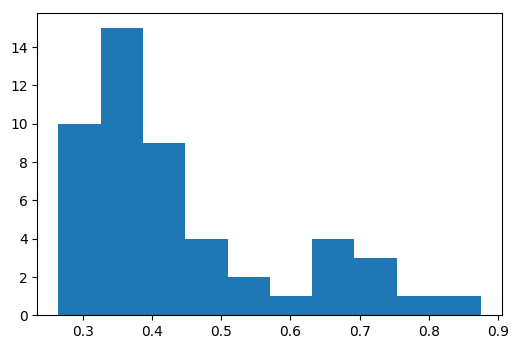

In [19]:
plt.hist([i[2] for i in dataset])

In [9]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


/home/kutay/anaconda3/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['randint']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [20]:
import csv
with open('niz-uptake.csv', 'w') as csvfile:
    spamwriter = csv.writer(csvfile, delimiter=',')
    spamwriter.writerow(['MOF', 'Metal', 'Uptake', 'Error', 'Pore Volume', 'Void Fraction', 'Density', 'Surface Area', 'Pore Diameter'])
    for row in dataset:
        spamwriter.writerow(row)

In [21]:
smofs = []
while len(smofs) < 5:
    idx = randint(0, 500)
    mof = mof_names[idx]
    if mof not in smofs:
        smofs.append(mof)
        print([mof, metal[idx], pza[idx], pza_err[idx], vp[idx], vf[idx], density[idx], gsa[idx], lcd[idx]])

['GITVEL', 'Zn', 0.377690167493203, 0.0204611603231584, 0.937704, 0.657772, 0.777112, 2173.05, 15.27666]
['EPOTAF', 'Cu', 0.50473744798207, 0.0587746433355421, 1.33629, 0.815159, 0.575241, 5193.82, 7.63453]
['PALTON', 'Cu', 0.334522696323141, 0.0188854096918204, 0.943608, 0.668939, 0.723595, 2222.85, 12.85281]
['RAHNOF', 'Cu', 0.506234443229245, 0.0150902811284499, 1.31352, 0.836055, 0.594852, 3488.29, 19.03849]
['PURQOJ', 'Cu', 0.360272103378875, 0.0248708647891448, 0.822958, 0.654765, 0.847078, 2364.76, 11.31224]


## Save MOF images

In [27]:
import os
import glob
import yaml
import subprocess

img_dir = '/home/kutay/Documents/git/visualization/sciviscomm/assignment/mofs'
mof_dir = '/home/kutay/Documents/Research/MOFs/CORE_ALL'

In [28]:
mof_list = [i[0] for i in dataset]
for mof in mof_list:
    mof_file = glob.glob(os.path.join(mof_dir, '%s*.cif' % mof))[0]
    print(mof_file)
    img_file = os.path.join(img_dir, '%s.svg' % mof)
    subprocess.call(['obabel', mof_file, '-O', img_file, '-xS', '-xd', '-xb', 'none'])

/home/kutay/Documents/Research/MOFs/CORE_ALL/BEPNOB_clean.cif
/home/kutay/Documents/Research/MOFs/CORE_ALL/SEVLEM_clean.cif
/home/kutay/Documents/Research/MOFs/CORE_ALL/LURRIA_clean.cif
/home/kutay/Documents/Research/MOFs/CORE_ALL/VEMMEG_clean.cif
/home/kutay/Documents/Research/MOFs/CORE_ALL/FUNBEW_clean.cif
/home/kutay/Documents/Research/MOFs/CORE_ALL/LOWQIX_clean.cif
/home/kutay/Documents/Research/MOFs/CORE_ALL/BAZGAM_clean.cif
/home/kutay/Documents/Research/MOFs/CORE_ALL/OSAVUA_clean.cif
/home/kutay/Documents/Research/MOFs/CORE_ALL/GUPCAW_clean.cif
/home/kutay/Documents/Research/MOFs/CORE_ALL/RAVXAP_clean.cif
/home/kutay/Documents/Research/MOFs/CORE_ALL/CAXTUS_clean.cif
/home/kutay/Documents/Research/MOFs/CORE_ALL/SONVEX_neutral_b.cif
/home/kutay/Documents/Research/MOFs/CORE_ALL/WEHJOK_clean.cif
/home/kutay/Documents/Research/MOFs/CORE_ALL/MOXPUL_clean.cif
/home/kutay/Documents/Research/MOFs/CORE_ALL/REGRAY_clean.cif
/home/kutay/Documents/Research/MOFs/CORE_ALL/QAQRUW01_clean.cif
/h